파이썬 머신러닝 완벽가이드 ch5. 6 ~ 8 pg. 337~ 362

### **[개념정리]**📝

### **06. 규제선형 모델 - 릿지, 라쏘, 엘라스틱넷**

(1) 규제 선형 모델의 개요

- 좋은 머신러닝 회귀 모델: 적절히 데이터에 적합, 회귀 계수가 기하급수적으로 커지는 것을 제어
- RSS 최소화->학습데이터에 맞추게 되어 회귀계수가 커질 수 있음. 과적합 방지 방법(회귀계수 크기 제어)과 균형 필요

- 비용 함수(Cost) 목표:
   - 비용함수에 alpha 값으로 페널티 부여, 회귀 계수 크기 감소로 과적합 개선:=> 규제

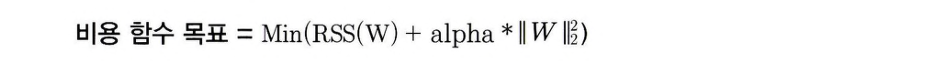

- 규제: L2 규제 적용(릿지 회귀)- W의 제곱에 페널티 부여 / L1 규제 적용(라쏘 회귀)-W의 절댓값에 페널티 부여, 영향력 적은 회귀계수를 0으로 함.


(2) 릿지 회귀

- 📑 Ridge(alpha=10): 릿지 클래스로 구현, alpha는 릿지 회귀의 alpha L2 규제 계수.
- 규제 없는 선형회귀보다 더 뛰어난 예측성능
- alpha 값 커질수록 회귀계수 값이 작아짐. 릿지 회귀 경우 회귀 계수를 0으로 만들지는 않음.

(3) 라쏘 회귀

- L1 규제 적용(|W|* alpha)
- L2 규제는 회귀 계수의 크기를 감소시키고, L1규제는 불필요한 회귀 계수를 0으로 만들고 제거함. 즉, 적절한 피처만 회귀에 포함(피처 선택)
- 📑 Lasso(alpha=param)
   - alpha는 L1 규제 계수. 크기가 증가함에 따라 일부 피처 계수가 0으로 바뀜. 피처 선택의 효과
- 규제 없는 선형 회귀보다 뛰어난 예측성능 보임

(4) 엘라스틱넷 회귀

- L1+L2 규제 결합한 회귀.
- RSS(W) + alpha2* W^2 + alpha1 *|W| 최소화하는 W
- 서로 상관관계가 높은 피처들의 경우 중요 피처만 선택, 나머지는 회귀계수를 0으로 만드는 성향이 강함. 회귀계수의 값의 급격한 변동 완화를 위해 L2 규제 추가
- 수행시간이 오래 걸림
- 📑 ElasticNet(alpha = param, l1_ratio=0.7)
  - alpha = a+b (a는 L1규제의 alpha, b는 L2 규제의 alpha)
  - lr_ratio: a/(a+b)

- alpha값들에 따른 피처들의 회귀계수 값이 라쏘보다는 상대적으로 0이되는 값이 적음

- 상황에 따라 좋은 회귀 기법이 달라짐. 각각 하이퍼 파라미터 변경하며 최적의 예측 성능 찾아야함.
- 선형 회귀이 경우 데이터의 분포도의 정규화, 인코딩 방법이 매우 중요함

(5) 선형 회귀 모델을 위한 데이터 변환

 - 선형 모델은 일반적으로 피처와 타깃 간 선형관계 가정, 최적 선형함수 찾아내 결괏값을 예측함.
    - 피처와 타깃 분포가 정규분포 형태를 선호
    - 타깃은 정규 분포가 아니라 특정값의 분포가 치우핀 왜곡 형태분포일 경우 예측 성능에 부정적임
    - 스케일링, 정규화 매우 중요 (심하게 왜곡 시)

- 사이킷런 이용한 변환 작업:
   - 1. StandardScaler: 평균 0, 분산1 표준정규분포 세트로 변환/ MinMaxScaler로 최소 0, 최대 1인 정규화 수행
   - 2. 예측 성능 향상 없을 시 다항 특성 적용해 변환
   - 3. 로그변환(정규분포에 가까운 형태로 분포됨)

- 타깃값은 일반적으로 로그 변환 적용. 결정값을 정규값으로 변환 시 원복하기 어렵기 때문

- 변환유형📑
   - 다항식 변환은 성능 개선은 되나 피처 개수가 많을 경우 적용하기 어려움. 데이터 건수가 많으면 많은 시간 소모.

```
- 표준정규분포변환(StandardScaler().fit_transform(data))
- 최대최소 정규화(MinMaxscaler().fit_transform(data))
- 로그변환(np.log1p(data))
- 2차 다항식 변환( PolynomialFeatures(degree=2, include_bias=False).fit_transform(scaled_data))
```




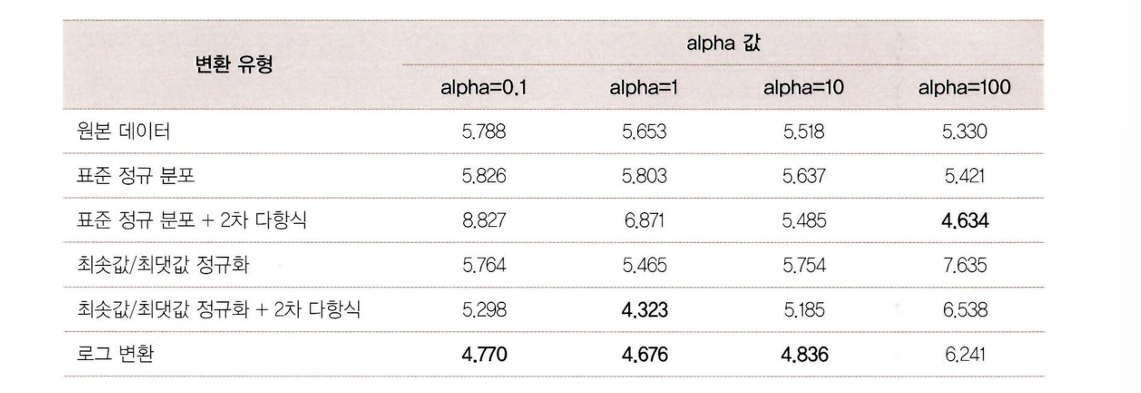

### **07. 로지스틱 회귀**

- 로지스틱 회귀: 선형 회귀 방식을 분류에 적용
- 회귀의 선형 여부는 가중치(W) 변수의 선형여뷰를 따름.
- 로지스틱 회귀는 선형 함수의 회귀 최적선이 아닌 시그모이드 함수 최적선을 찾고 시그모이드 함수의 반환값을 확률로 간주해 분류 결정함.
   - 시그모이드 함수: y = 1/(1+exp(-x)), y의 범위가 0~1

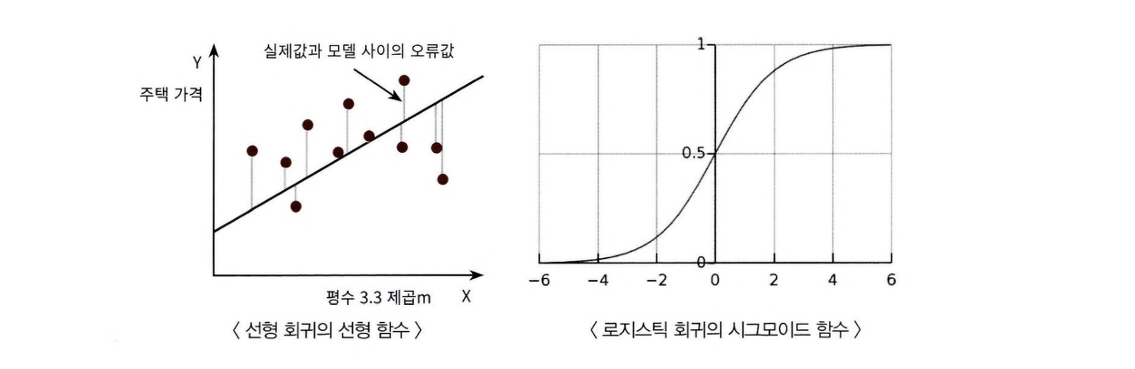

- 회귀를 이용해 분류(0,1) 예측하기-> S자 커브 형태의 시그모이드 함수가 더 정확히 분류 가능

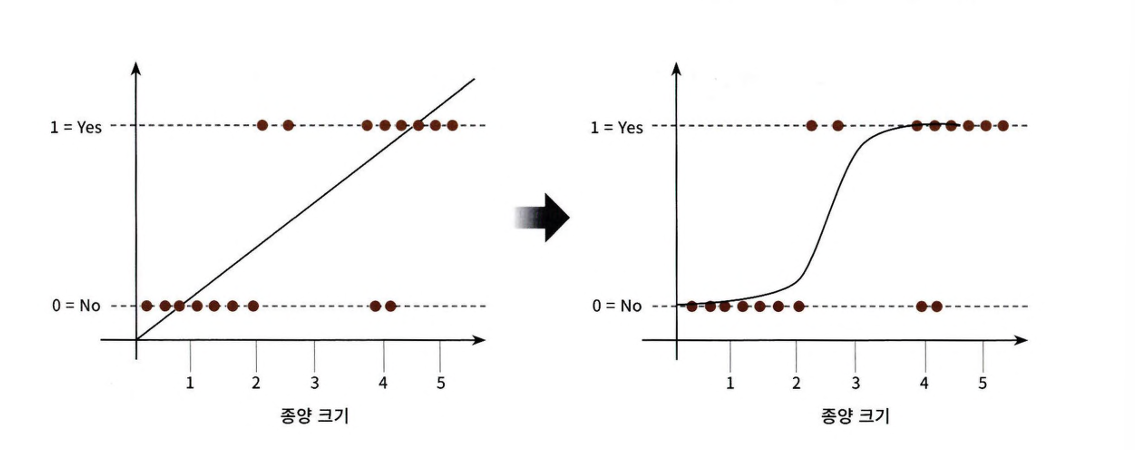

- 회귀계수 최적화:

```
- lbfgs: 기본 설정값, 메모리 절약 가능
- liblinear: 이전 버전 기본 설정값
- newton-cg: 좀 더 정교한 최적화, 속도 느림
- sag: 경사하강법 기반 최적화. 대용량 데이터에서 빠름
- saga: sag와 유사, L1 정규화 가능
```

- 선형 회귀 계열이므로 데이터의 정규 분포도에 따라 예측 성능 영향 받음, 표준 스케일링 적용한 후 데이터 셋 분리

- 📑 LogisticRegression( solver=, max_iter=,penalty=, C=)
  - max_iter: solver로 지정된 최적화 알고리즘이 최적 수렴할 수 있는 최대 반복 회수.
  - penalty: 규제 유형 (l2,l1)
  - C: 규제 강도 조절(1/alpha)
  - solver: 기본 lbfgs

- solver 별 성능 차이가 크지는 않음
- GridSearchCV로 최적화 가능
- 가볍고 빠르며 이진 분류 예측 성능도 뛰어남. 희소 데이터 세트 분류에서도 뛰어난 성능을 보여서 텍스트 분류에도 자주 사용




### **08. 회귀 트리**

- 머신러닝 기반의 회귀: 회귀 계수 기반으로 최적 회귀함수 도출이 목표.// 회귀 트리: 결정트리 같은 트리 기반으로 하는 회귀 방식

- 분류 트리: 특정 클래스 레이블 결정// 회귀 트리: 리프 노드의 데이터 평균값으로 회귀 예측값을 계산

- 회귀 트리의 동작과정
  - X 피처를 결정 트리 기반으로 분할:

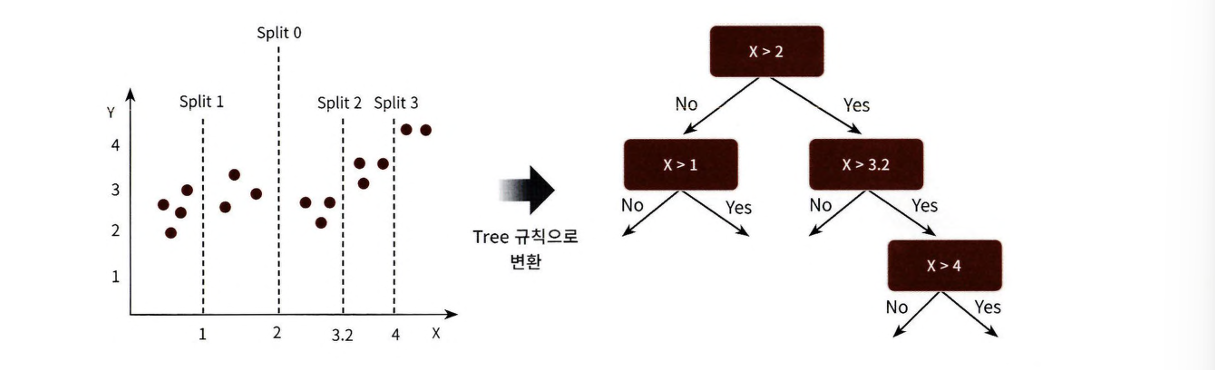

  - 리프 노드의 데이터 값의 평균값을 구해 최종 리프 노드에 결정 값으로 할당

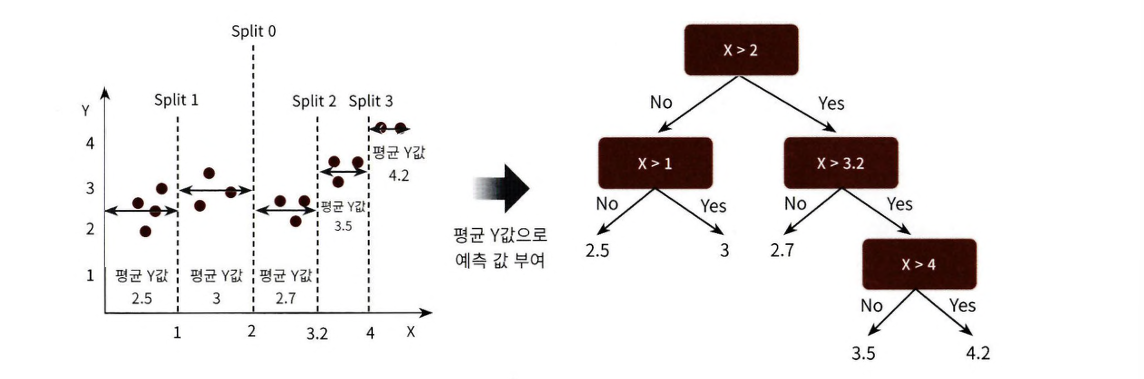

- CART 알고리즘 기반 (결정트리, 랜덤포레스트, GBM, XGBoost, LightGBM 등 모든 트리 기반 알고리즘)은 회귀도 가능함.

- Estimator 클래스:

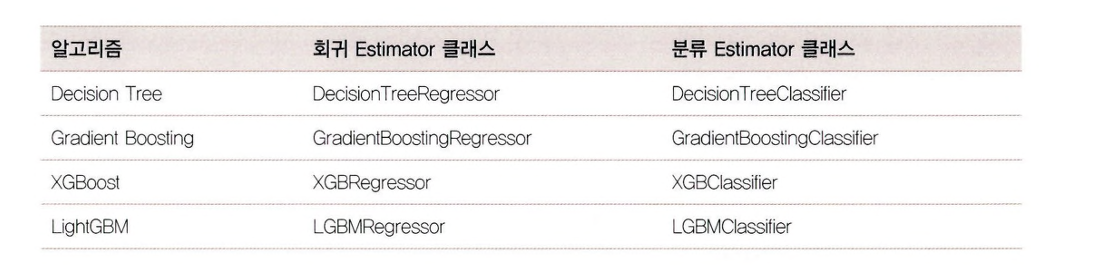

- feature_importances_로 피처 중요도 시각화
- 하이퍼 파라미터들은 동일함
- 회귀 트리는 선형 회귀와 달리 분할되는 데이터 지점에 따라 브랜치를 만들며 계단 형태로 회귀선 생성
   - max_depth가 너무 클 경우 이상치도 학습해 과적합 우려

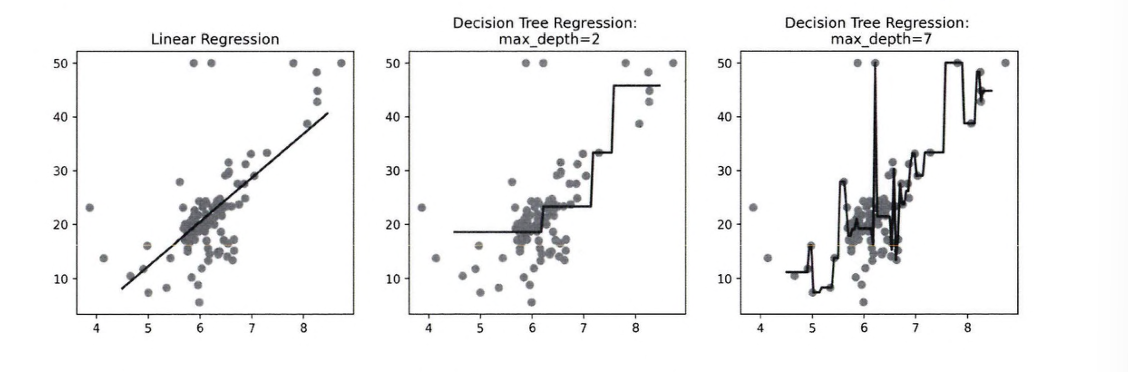

### **[코드 필사]** 📝

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

# feature name이 없으므로 따로 지정해줘야 함.
feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
bostonDF = pd.DataFrame(boston, columns = feature_names)

In [3]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

- 릿지 회귀

In [4]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10 으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print(' 5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds의 평균 RMSE: 5.518


In [5]:
# 릿지에 사용될 alpha 파라미터 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas:
    ridge = Ridge(alpha = alpha)

    # cross_val_score를 이용해 5 폴드의 평균 rmse를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5 folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE: 5.829
alpha 0.1일 때 5 folds의 평균 RMSE: 5.788
alpha 1일 때 5 folds의 평균 RMSE: 5.653
alpha 10일 때 5 folds의 평균 RMSE: 5.518
alpha 100일 때 5 folds의 평균 RMSE: 5.330


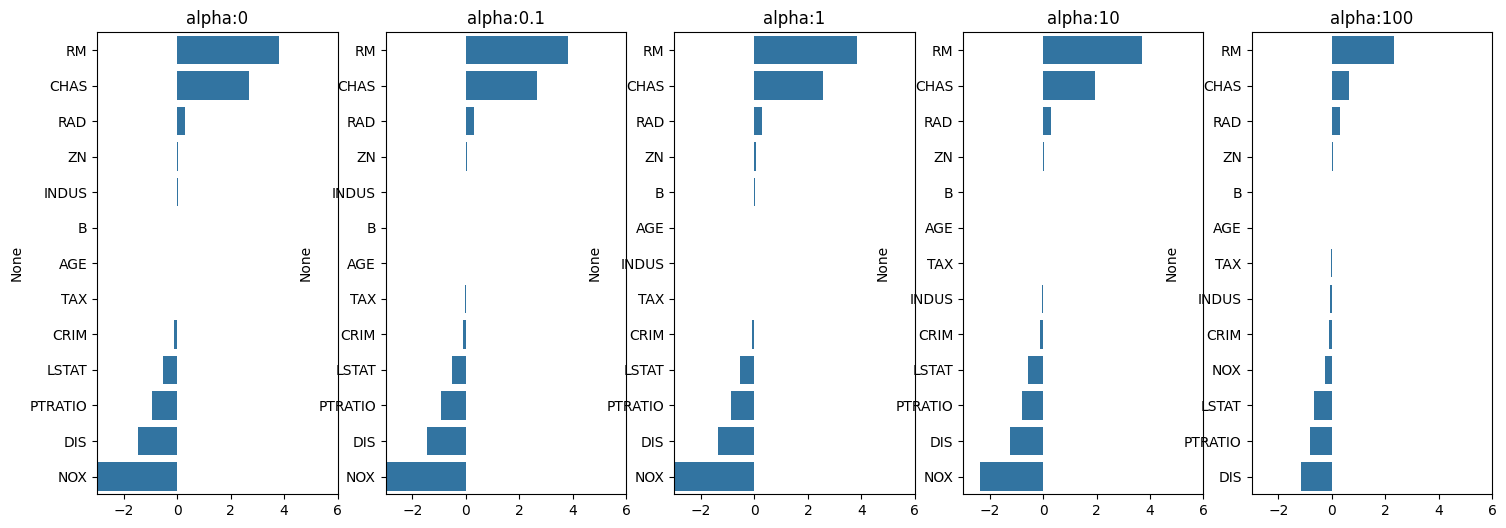

In [6]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DF 생성
coeff_df = pd.DataFrame()

# aplhas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장, pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_data, y_target)
  # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
  coeff = pd.Series(data=ridge.coef_, index = X_data.columns)
  colname = 'alpha:' + str(alpha)
  coeff_df[colname] = coeff
  # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화, 회귀 계수값이 높은 순으로 표현
  coeff = coeff.sort_values(ascending = False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

# for문 밖에서 맷플롯립의 show 호출, aplha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [7]:
# alpha 값의 변화에 따른 릿지 회귀 계수 값
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


- 라쏘 회귀

In [8]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n = None, y_target_n = None,
                        verbose = True, return_coeff=True):
  coeff_df = pd.DataFrame()
  if verbose: print('######', model_name, '######')
  for param in params:
    if model_name == 'Ridge': model = Ridge(alpha=param)
    elif model_name == 'Lasso': model = Lasso(alpha=param)
    elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
    neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5 folds의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
    # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

    model.fit(X_data_n, y_target_n)
    if return_coeff:
      # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
      coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
      colname='alpha:'+str(param)
      coeff_df[colname]=coeff
  return coeff_df
# end of get_linear_regre_eval

In [9]:
# 라쏘에 사용될 alpha 파라미터 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

###### Lasso ######
alpha 0.07일 때 5 folds의 평균 RMSE: 5.612
alpha 0.1일 때 5 folds의 평균 RMSE: 5.615
alpha 0.5일 때 5 folds의 평균 RMSE: 5.669
alpha 1일 때 5 folds의 평균 RMSE: 5.776
alpha 3일 때 5 folds의 평균 RMSE: 6.189


In [10]:
# alpha가 0.07일때 가장 좋은 평균 rmse
# 반환된 coeff_lasso_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


- 엘라스틱넷 회귀

In [11]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval()함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n = X_data, y_target_n = y_target)

###### ElasticNet ######
alpha 0.07일 때 5 folds의 평균 RMSE: 5.542
alpha 0.1일 때 5 folds의 평균 RMSE: 5.526
alpha 0.5일 때 5 folds의 평균 RMSE: 5.467
alpha 1일 때 5 folds의 평균 RMSE: 5.597
alpha 3일 때 5 folds의 평균 RMSE: 6.068


In [12]:
# 반환된 coeff_elastic_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


- 선형 괴귀 모델을 위한 데이터 변환

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다항식 측성을 추가할 때 적용. p_degree는 2 이상 부여하지 않음.
def get_scaled_data(method='None', p_degree=None, input_data=None):
  if method == 'Standard':
    scaled_data = StandardScaler().fit_transform(input_data)
  elif method == 'MinMax':
    scaled_data = MinMaxScaler().fit_transform(input_data)
  elif method == 'Log':
    scaled_data = np.log1p(input_data)
  else:
    scaled_data = input_data

  if p_degree != None:
    scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

  return scaled_data

In [14]:
# Ridge의 alpha 값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]

# 5개 방식으로 변환. 먼저 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
  X_data_scaled = get_scaled_data(method = scale_method[0], p_degree=scale_method[1], input_data=X_data)
  print('\n## 변환 유형: {0}, Polynomial Degree: {1}'.format(scale_method[0], scale_method[1]))
  get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False, return_coeff=False)


## 변환 유형: None, Polynomial Degree: None
alpha 0.1일 때 5 folds의 평균 RMSE: 5.788
alpha 1일 때 5 folds의 평균 RMSE: 5.653
alpha 10일 때 5 folds의 평균 RMSE: 5.518
alpha 100일 때 5 folds의 평균 RMSE: 5.330

## 변환 유형: Standard, Polynomial Degree: None
alpha 0.1일 때 5 folds의 평균 RMSE: 5.826
alpha 1일 때 5 folds의 평균 RMSE: 5.803
alpha 10일 때 5 folds의 평균 RMSE: 5.637
alpha 100일 때 5 folds의 평균 RMSE: 5.421

## 변환 유형: Standard, Polynomial Degree: 2
alpha 0.1일 때 5 folds의 평균 RMSE: 8.827
alpha 1일 때 5 folds의 평균 RMSE: 6.871
alpha 10일 때 5 folds의 평균 RMSE: 5.485
alpha 100일 때 5 folds의 평균 RMSE: 4.634

## 변환 유형: MinMax, Polynomial Degree: None
alpha 0.1일 때 5 folds의 평균 RMSE: 5.764
alpha 1일 때 5 folds의 평균 RMSE: 5.465
alpha 10일 때 5 folds의 평균 RMSE: 5.754
alpha 100일 때 5 folds의 평균 RMSE: 7.635

## 변환 유형: MinMax, Polynomial Degree: 2
alpha 0.1일 때 5 folds의 평균 RMSE: 5.298
alpha 1일 때 5 folds의 평균 RMSE: 4.323
alpha 10일 때 5 folds의 평균 RMSE: 5.185
alpha 100일 때 5 folds의 평균 RMSE: 6.538

## 변환 유형: Log, Polynomial Degree: None
alpha 0.1일 때 5 folds의 평균

**로지스틱 회귀**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [17]:
from sklearn.metrics import accuracy_score, roc_auc_score
# 로지스틱 회귀를 이용하여 학습 및 예측 수행.
# solver 인자값을 생성자로 입력하지 않으면 solver='lbfgs'
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {0:.3f}, roc_auc:{1:.3f}'.format(accuracy_score(y_test, lr_preds), roc_auc_score(y_test, lr_preds)))

accuracy: 0.977, roc_auc:0.972


In [18]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag','saga']

# 여러 개의 solver 값별로 LogisticRegression 학습 후 성능 평가
for solver in solvers:
  lr_clf = LogisticRegression(solver=solver, max_iter=600)
  lr_clf.fit(X_train, y_train)
  lr_preds = lr_clf.predict(X_test)

  # accuracy와 roc_auc 측정
  print('solver:{0}, accuracy: {1:.3f}, roc_auc:{2:.3f}'.format(solver, accuracy_score(y_test, lr_preds), roc_auc_score(y_test, lr_preds)))

solver:lbfgs, accuracy: 0.977, roc_auc:0.972
solver:liblinear, accuracy: 0.982, roc_auc:0.979
solver:newton-cg, accuracy: 0.977, roc_auc:0.972
solver:sag, accuracy: 0.982, roc_auc:0.979
solver:saga, accuracy: 0.982, roc_auc:0.979


In [19]:
# GridSearchCV 이용해 위스콘신 데이터 세트에서 solver, penalty, C 최적화
from sklearn.model_selection import GridSearchCV
params = {'solver':['liblinear','lbfgs'],
          'penalty': ['l2','l1'],
          'C':[0.01, 0.1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

**회귀 트리**

In [20]:
# 랜덤포레스트 회귀 트리 이용해 보스턴 주택 가격 예측하기

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 보스턴 데이터 세트 로드
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

# feature name이 없으므로 따로 지정해줘야 함.
feature_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
bostonDF = pd.DataFrame(boston, columns = feature_names)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차검증의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 교차검증의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 교차검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 교차검증의 개별 Negative MSE scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차검증의 개별 RMSE scores: [2.81 3.63 4.54 6.8  4.34]
5 교차검증의 평균 RMSE: 4.423


In [21]:
# 결정트리, GBM, XGBoost, LightGBM의 Regressor 모두 이용해 보스턴 주택 가격 예측 수행

def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
  rmse_scores = np.sqrt(-1*neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('####', model.__class__.__name__, '####')
  print('5 교차 검증의 평균 RMSE: {0:.3f}'.format(avg_rmse))

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators = 1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000, verbose=-1)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_prediction(model, X_data, y_target)

#### DecisionTreeRegressor ####
5 교차 검증의 평균 RMSE: 5.978
#### RandomForestRegressor ####
5 교차 검증의 평균 RMSE: 4.423
#### GradientBoostingRegressor ####
5 교차 검증의 평균 RMSE: 4.269
#### XGBRegressor ####
5 교차 검증의 평균 RMSE: 4.959
#### LGBMRegressor ####
5 교차 검증의 평균 RMSE: 4.646


<Axes: xlabel='None', ylabel='None'>

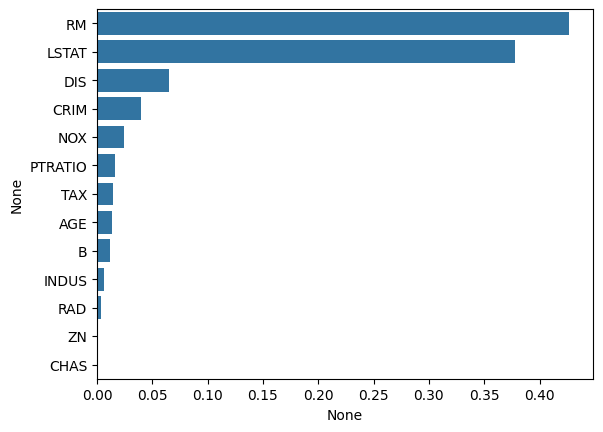

In [23]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


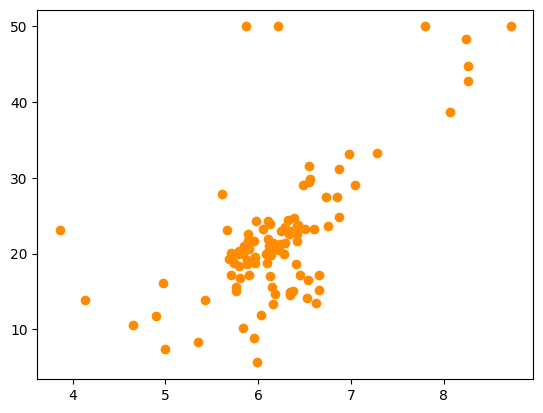

In [24]:
# 회귀트리 Regressor의 예측값 판단을 선형 회귀와 비교 시각화

# X에 RM, Y에 Price 산점도
bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성.
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

# 보스턴 주택 가격 데이터에서 시각화를 위한 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

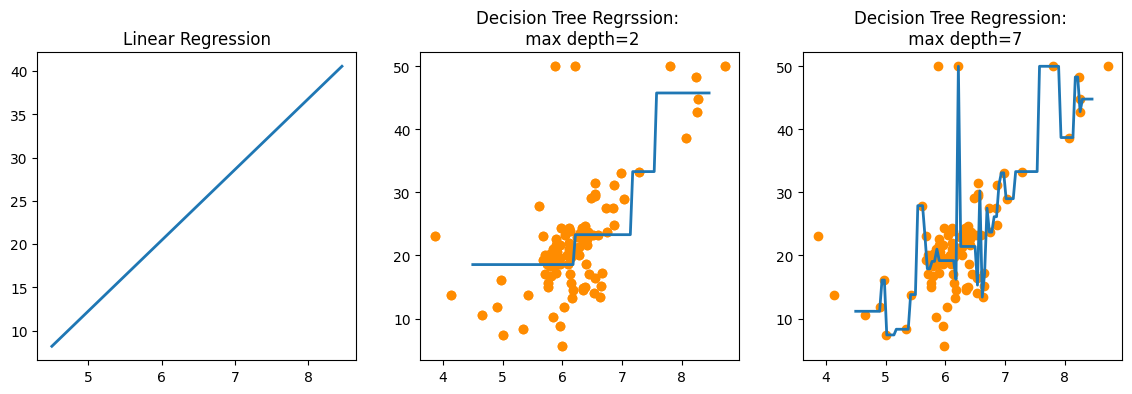

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축 값을 4.5~8.5로 변환하여 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
# 선형 회귀로 학습괸 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='Linear', linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regrssion: \n max depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:2', linewidth=2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)